In [1]:
library('igraph')
library('Matrix')
library('pracma')

Warning message:
"package 'igraph' was built under R version 3.6.3"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Warning message:
"package 'Matrix' was built under R version 3.6.3"
Warning message:
"package 'pracma' was built under R version 3.6.3"

Attaching package: 'pracma'


The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu




#### a)

In [2]:
g_1000 <- barabasi.game(1000, m=1, directed=F);
is.connected(g_1000)

[1] TRUE

#### b)

IGRAPH clustering fast greedy, groups: 35, mod: 0.93
+ groups:
  $`1`
   [1]   9  12  51  82  95 100 106 115 117 131 132 166 167 180 197 204 215 221
  [19] 225 252 253 262 264 295 302 304 333 360 381 387 393 402 414 420 464 473
  [37] 500 519 520 523 536 570 588 593 602 624 632 633 643 676 677 681 700 711
  [55] 729 740 743 764 766 767 781 788 794 812 830 831 851 925 934 951 980 999
  
  $`2`
   [1]  16  20  35  47  56  65  73  81  99 105 169 185 192 195 217 238 270 282
  [19] 309 328 332 373 403 421 432 442 452 465 542 544 561 569 583 590 598 660
  [37] 696 701 748 750 757 840 888 891 893 905 923 953 970
  + ... omitted several groups/vertices
---------------------------------------------------------------------------------
 The number of communities is: 35
 The modularity score of this partitioning is: 0.931561691821955

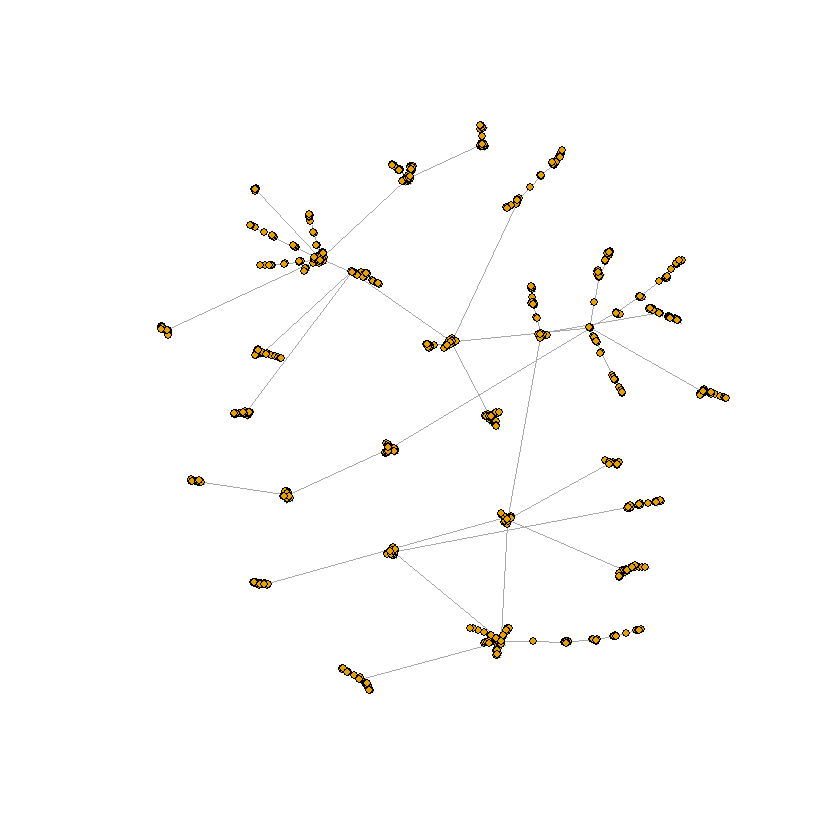

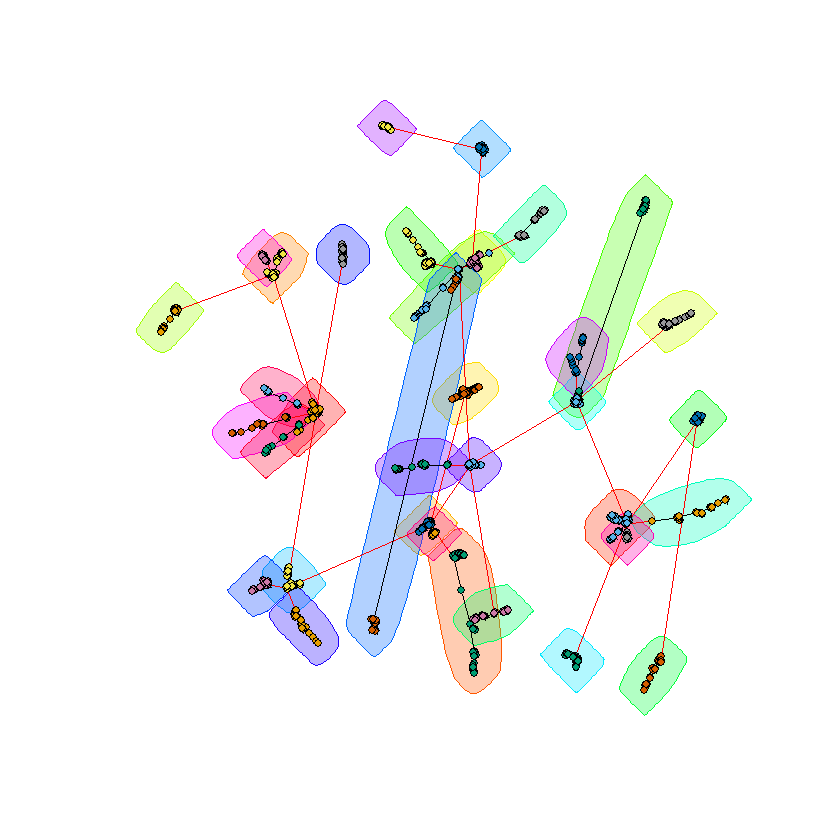

In [3]:
g_1000_comstr <- cluster_fast_greedy(g_1000)
print(g_1000_comstr)
cat('---------------------------------------------------------------------------------')
cat(paste('\n',"The number of communities is:",length(g_1000_comstr)))
cat(paste('\n',"The modularity score of this partitioning is:",modularity(g_1000_comstr)))
plot(g_1000,vertex.size=3,vertex.label=NA)
plot(g_1000_comstr, g_1000, vertex.size=3, vertex.label=NA)

#### c)

IGRAPH clustering fast greedy, groups: 108, mod: 0.98
+ groups:
  $`1`
    [1]    2  147  270  287  329  359  388  403  408  454  467  490  525  544
   [15]  584  640  785  801  828  837  847  961  970 1077 1100 1116 1142 1165
   [29] 1270 1275 1279 1284 1309 1332 1333 1340 1364 1398 1494 1505 1521 1544
   [43] 1549 1558 1591 1599 1633 1680 1685 1701 1722 1777 1838 1926 2046 2067
   [57] 2094 2113 2269 2280 2358 2386 2465 2499 2512 2635 2668 2747 2823 2824
   [71] 2829 2842 2887 2888 2925 2929 3007 3079 3135 3145 3199 3215 3265 3294
   [85] 3400 3503 3584 3890 3968 3992 4028 4068 4076 4104 4105 4125 4133 4140
   [99] 4198 4208 4315 4368 4455 4500 4562 4732 4773 4811 4826 4837 5017 5031
  [113] 5036 5065 5095 5145 5162 5202 5225 5333 5361 5542 5565 5573 5578 5586
  + ... omitted several groups/vertices
---------------------------------------------------------------------------------
 The number of communities is: 108
 The modularity score of this partitioning is: 0.978078055830402

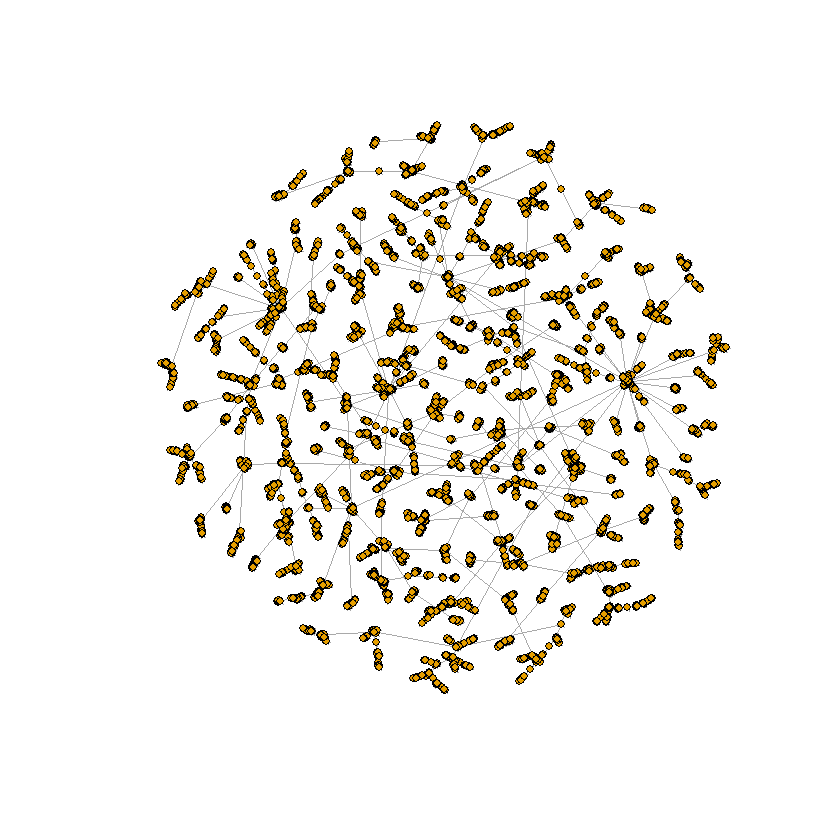

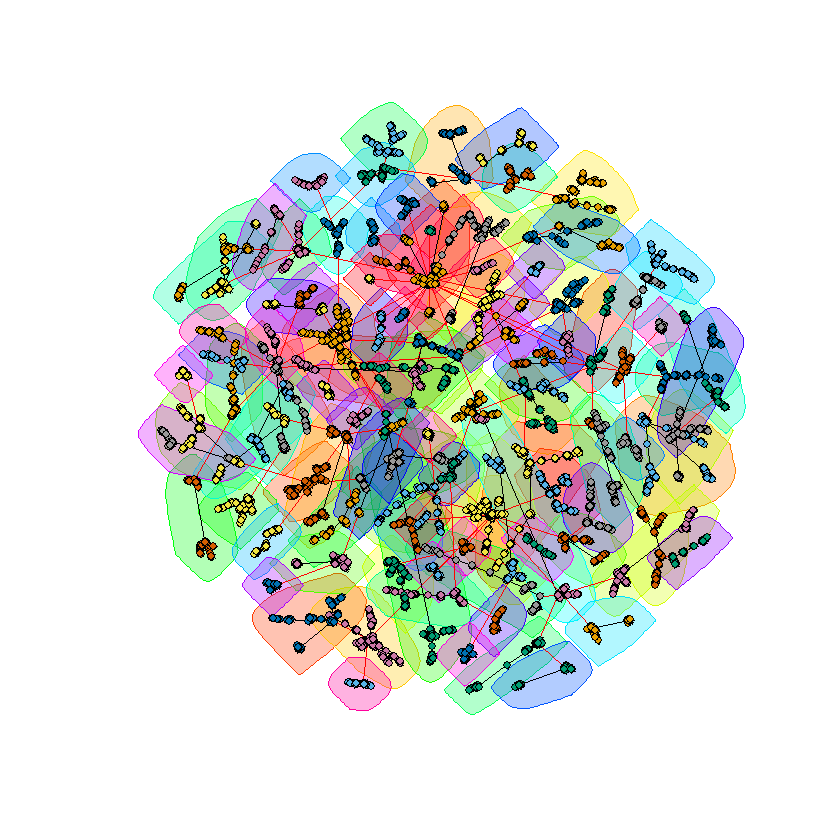

In [4]:
g_10000 <- barabasi.game(10000, m=1, directed=F);
g_10000_comstr <- cluster_fast_greedy(g_10000)
print(g_10000_comstr)
cat('---------------------------------------------------------------------------------')
cat(paste('\n',"The number of communities is:",length(g_10000_comstr)))
cat(paste('\n',"The modularity score of this partitioning is:",modularity(g_10000_comstr)))
plot(g_10000,vertex.size=3,vertex.label=NA)
plot(g_10000_comstr, g_10000, vertex.size=3, vertex.label=NA)

#### d)


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -8.649       -2.417  



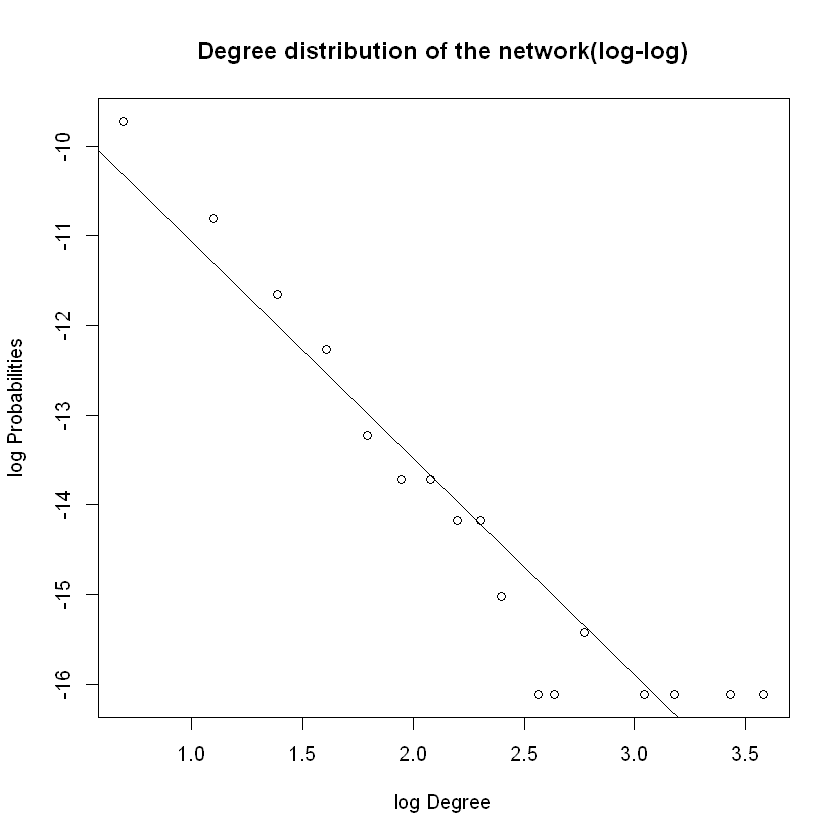

In [8]:
degrees.sum = vector(mode = "numeric", length = 100)

for (i in 10000){
    g = barabasi.game(n=1000, m=1, directed=FALSE)
    degrees.sum[1:length(degree.distribution(g))]= degrees.sum[1:length(degree.distribution(g))] + degree.distribution(g)
  
    }
  
idx = which(degrees.sum != 0, arr.ind=TRUE)
log_degree = log(seq(1:1000))[idx]
log_distribution = log(degrees.sum/10000)[idx]
    
relation = lm(log_distribution ~ log_degree)
print(relation)

plot(log_degree,log_distribution,abline(relation), 
     main="Degree distribution of the network(log-log)", xlab="log Degree", ylab="log Probabilities")


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -7.960       -2.965  



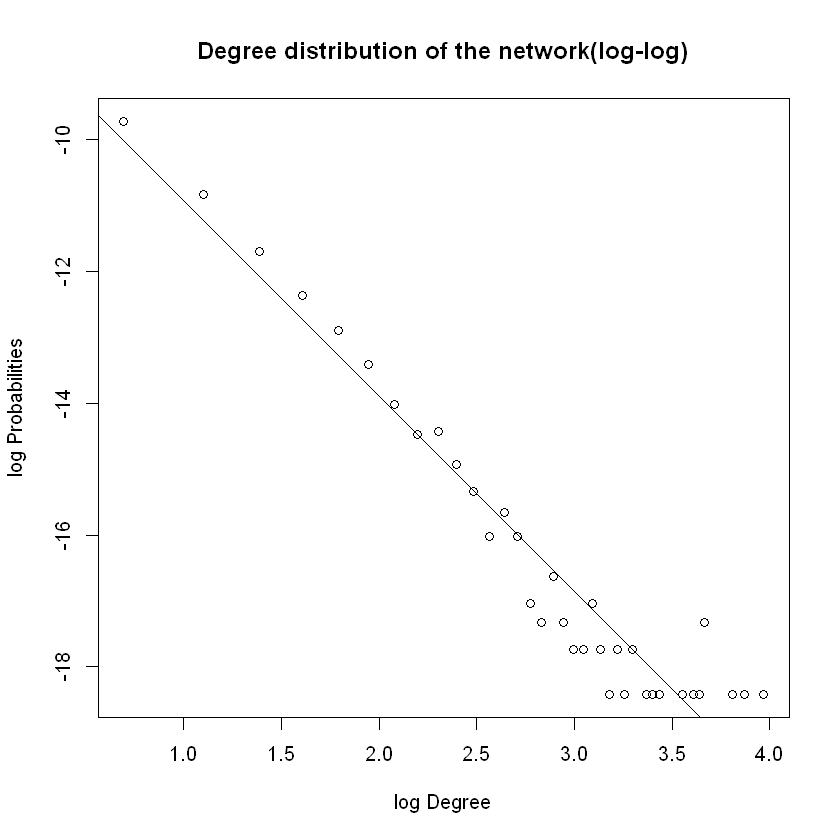

In [9]:
degrees.sum = vector(mode = "numeric", length = 100)

for (i in 10000){
    g = barabasi.game(n=10000, m=1, directed=FALSE)
    degrees.sum[1:length(degree.distribution(g))]= degrees.sum[1:length(degree.distribution(g))] + degree.distribution(g)
  
    }
  
idx = which(degrees.sum != 0, arr.ind=TRUE)
log_degree = log(seq(1:1000))[idx]
log_distribution = log(degrees.sum/10000)[idx]
    
relation = lm(log_distribution ~ log_degree)
print(relation)

plot(log_degree,log_distribution,abline(relation), 
     main="Degree distribution of the network(log-log)", xlab="log Degree", ylab="log Probabilities")

#### e)

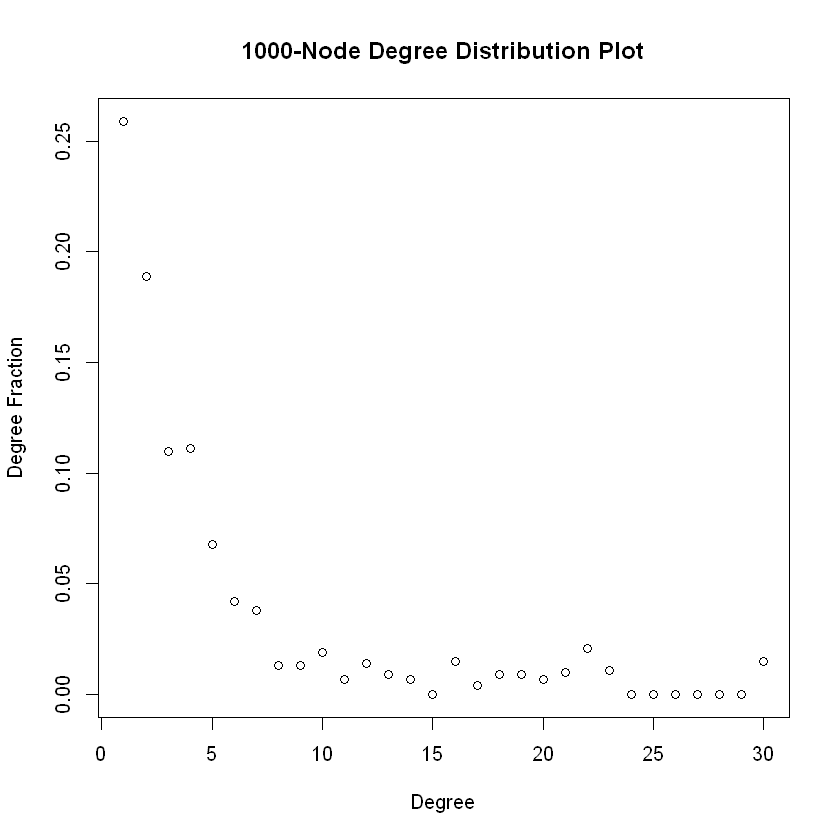

In [12]:
max_deg <- max(degree(g_1000))
j_deg_freq <- c(rep(0,max_deg))

for (k in seq(1,1000)) {
    
    i_node <- sample(1:1000, 1)
    i_neighbors <- neighbors(g_1000, i_node)
    
    j_node <- sample(i_neighbors, 1)
    
    j_deg_freq[degree(g_1000, j_node)] <- j_deg_freq[degree(g_1000, j_node)] + 1
}
j_deg_frac <- j_deg_freq / sum(j_deg_freq)
j_deg <- c(1:max_deg)
plot(x = j_deg, y = j_deg_frac, 
     main="1000-Node Degree Distribution Plot",
     xlab="Degree",ylab="Degree Fraction")


Call:
lm(formula = log_j_deg_frac ~ log_j_deg, na.action = na.exclude)

Coefficients:
(Intercept)    log_j_deg  
     -1.187       -1.187  



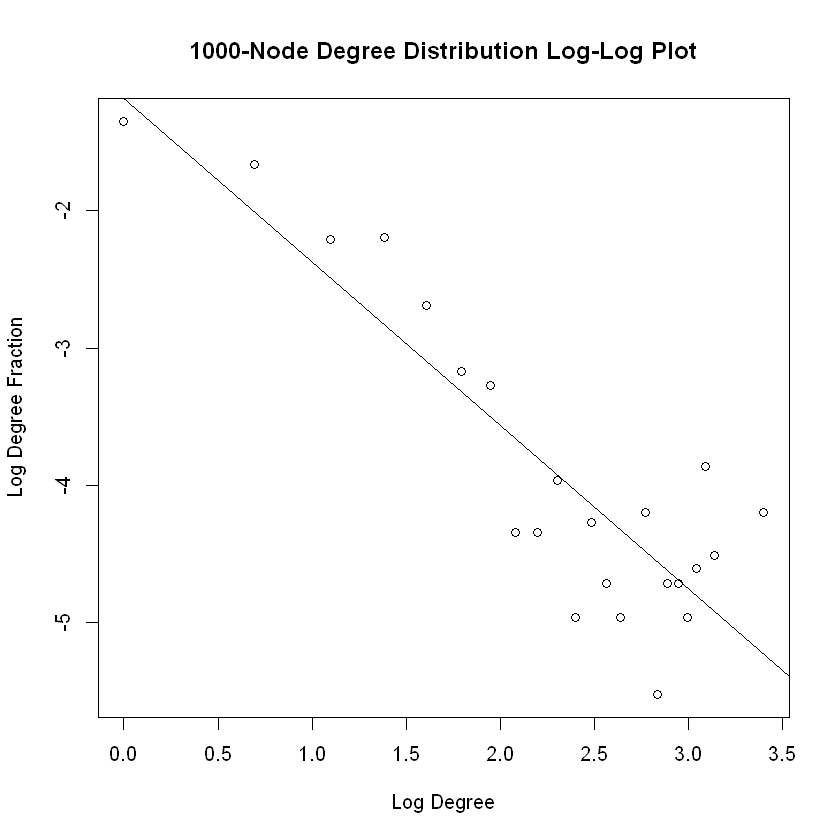

In [13]:
log_j_deg <- log(j_deg)
log_j_deg_frac <- log(j_deg_frac)
log_j_deg_frac[which(log_j_deg_frac == -Inf)] <- NA

# linear regression
reg_j_deg <- lm(log_j_deg_frac ~ log_j_deg, na.action = na.exclude)
print(reg_j_deg)

plot(x = log_j_deg, y = log_j_deg_frac, 
     main="1000-Node Degree Distribution Log-Log Plot",
     xlab="Log Degree",ylab="Log Degree Fraction") 
abline(reg_j_deg)

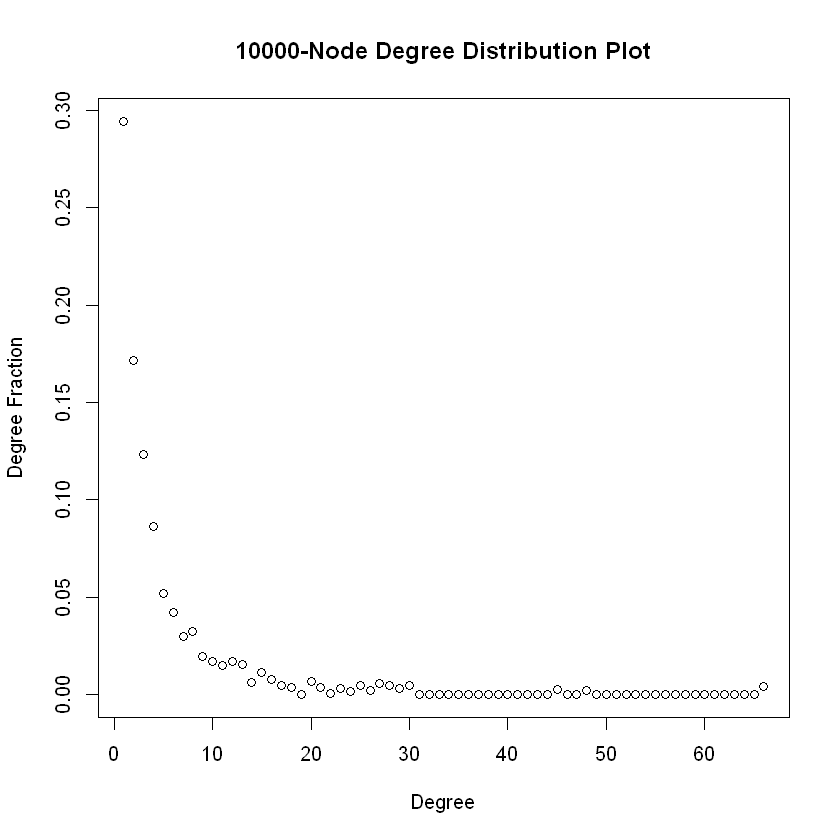

In [14]:
max_deg <- max(degree(g_10000))
j_deg_freq <- c(rep(0,max_deg))

for (k in seq(1,10000)) {
    
    i_node <- sample(1:10000, 1)
    i_neighbors <- neighbors(g_10000, i_node)
        j_node <- sample(i_neighbors, 1)
        j_deg_freq[degree(g_10000, j_node)] <- j_deg_freq[degree(g_10000, j_node)] + 1
}
j_deg_frac <- j_deg_freq / sum(j_deg_freq)
j_deg <- c(1:max_deg)
plot(x = j_deg, y = j_deg_frac, 
     main="10000-Node Degree Distribution Plot",
     xlab="Degree",ylab="Degree Fraction")


Call:
lm(formula = log_j_deg_frac ~ log_j_deg, na.action = na.exclude)

Coefficients:
(Intercept)    log_j_deg  
    -0.8741      -1.4299  



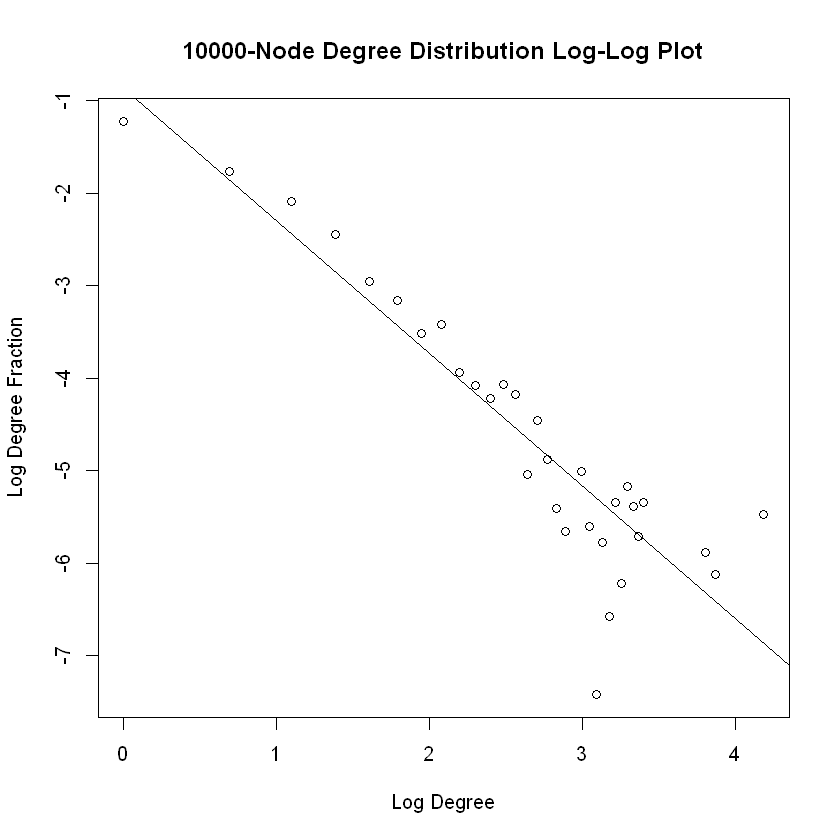

In [15]:
log_j_deg <- log(j_deg)
log_j_deg_frac <- log(j_deg_frac)
log_j_deg_frac[which(log_j_deg_frac == -Inf)] <- NA

# linear regression
reg_j_deg <- lm(log_j_deg_frac ~ log_j_deg, na.action = na.exclude)
print(reg_j_deg)

plot(x = log_j_deg, y = log_j_deg_frac, 
     main="10000-Node Degree Distribution Log-Log Plot",
     xlab="Log Degree",ylab="Log Degree Fraction") 
abline(reg_j_deg)

#### f)

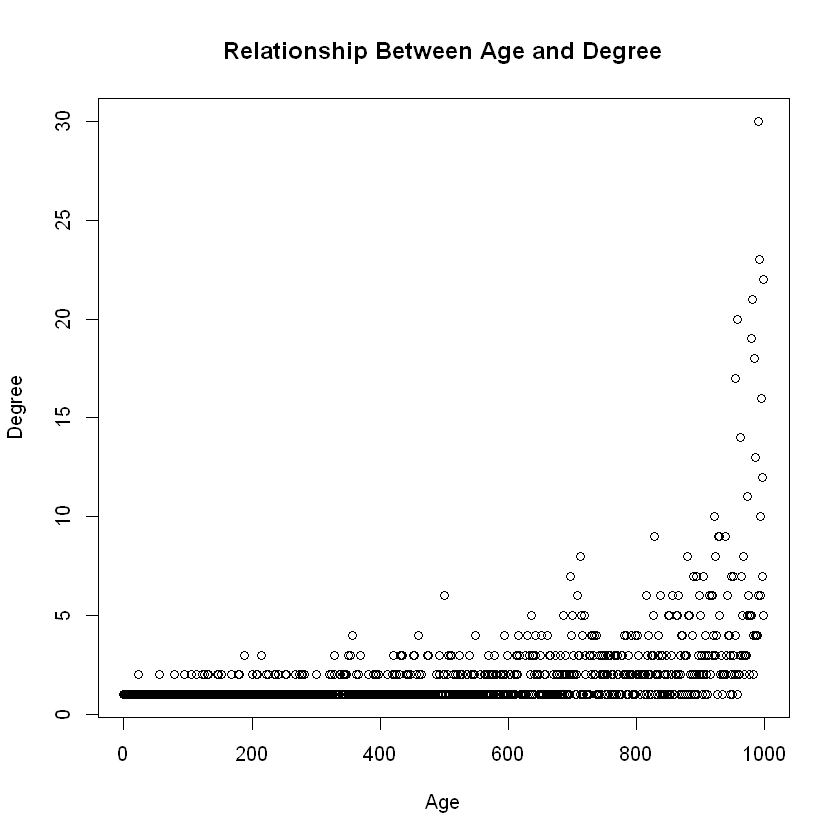

In [16]:
deg <- degree(g_1000)
age <- length(V(g_1000)) - V(g_1000)
plot(x = age, y = deg,
     main="Relationship Between Age and Degree",
     xlab="Age",ylab="Degree")

#### g)

##### n=1000, m=1, 2, 5

In [17]:
set.seed(0)
g_1000_m1 <- sample_pa(n = 1000, m = 1, directed = FALSE)
c_1000_m1 <- cluster_fast_greedy(g_1000_m1)
modularity(c_1000_m1)

[1] 0.9343257

In [18]:
set.seed(0)
g_1000_m2 <- sample_pa(n = 1000, m = 2, directed = FALSE)
c_1000_m2 <- cluster_fast_greedy(g_1000_m2)
modularity(c_1000_m2)

[1] 0.5226493

In [19]:
set.seed(0)
g_1000_m5 <- sample_pa(n = 1000, m = 5, directed = FALSE)
c_1000_m5 <- cluster_fast_greedy(g_1000_m5)
modularity(c_1000_m5)

[1] 0.2823105

##### n=10000, m=1, 2, 5

In [20]:
set.seed(0)
g_10000_m1 <- sample_pa(n = 10000, m = 1, directed = FALSE)
c_10000_m1 <- cluster_fast_greedy(g_10000_m1)
modularity(c_10000_m1)

[1] 0.9781674

In [21]:
set.seed(0)
g_10000_m1 <- sample_pa(n = 10000, m = 2, directed = FALSE)
c_10000_m1 <- cluster_fast_greedy(g_10000_m1)
modularity(c_10000_m1)

[1] 0.5300333

In [22]:
set.seed(0)
g_10000_m1 <- sample_pa(n = 10000, m = 5, directed = FALSE)
c_10000_m1 <- cluster_fast_greedy(g_10000_m1)
modularity(c_10000_m1)

[1] 0.2790432

#### h)

Origianl graph: 
Modularity =  0.934276117959804

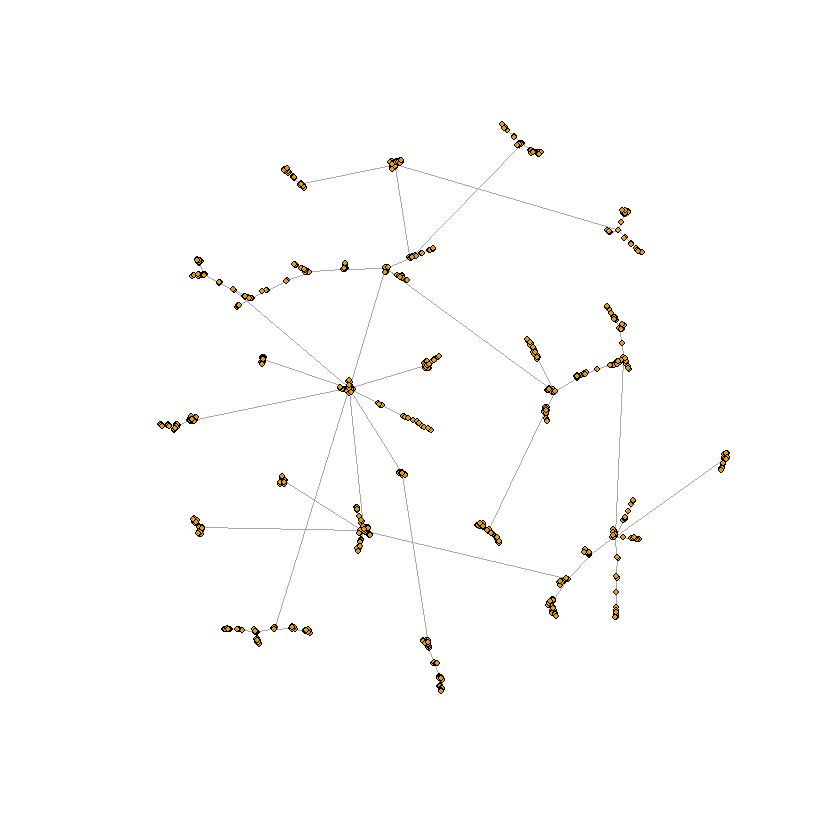

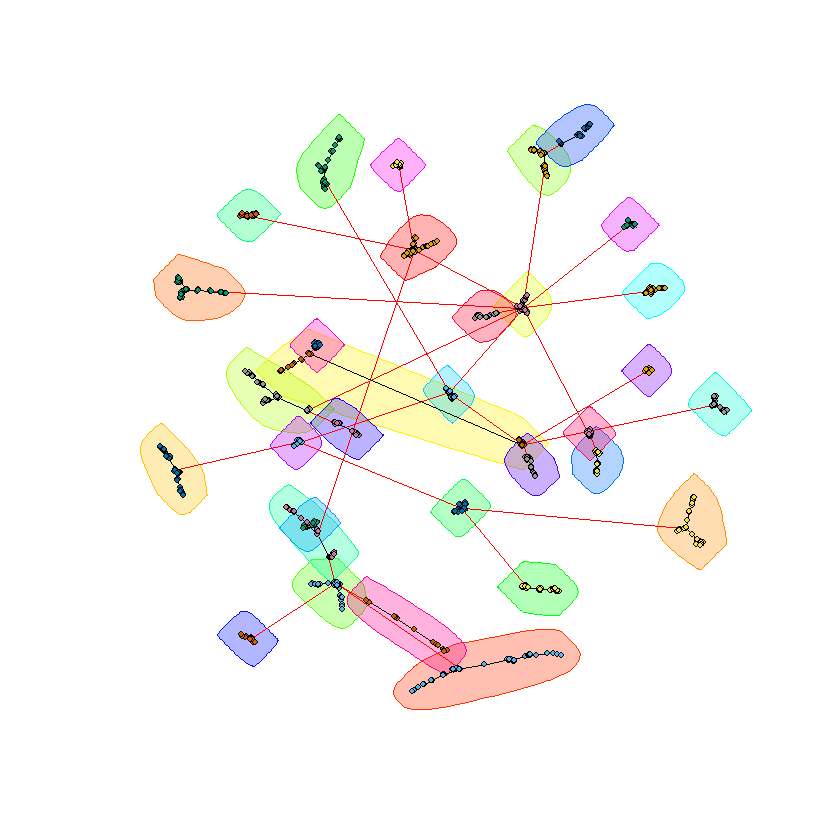

In [23]:
g1 = barabasi.game(n=1000, m=1, directed=FALSE)
degree_seq1 = degree(g1)
g_community = fastgreedy.community(g1)
g_modularity = modularity(g_community)
cat("Origianl graph: ")
cat(paste("\nModularity = ", g_modularity))
plot(g1,vertex.size=2, vertex.label=NA)
plot(g_community, g1, vertex.size=2, vertex.label=NA)

New graph: 
Modularity =  0.841757172588006

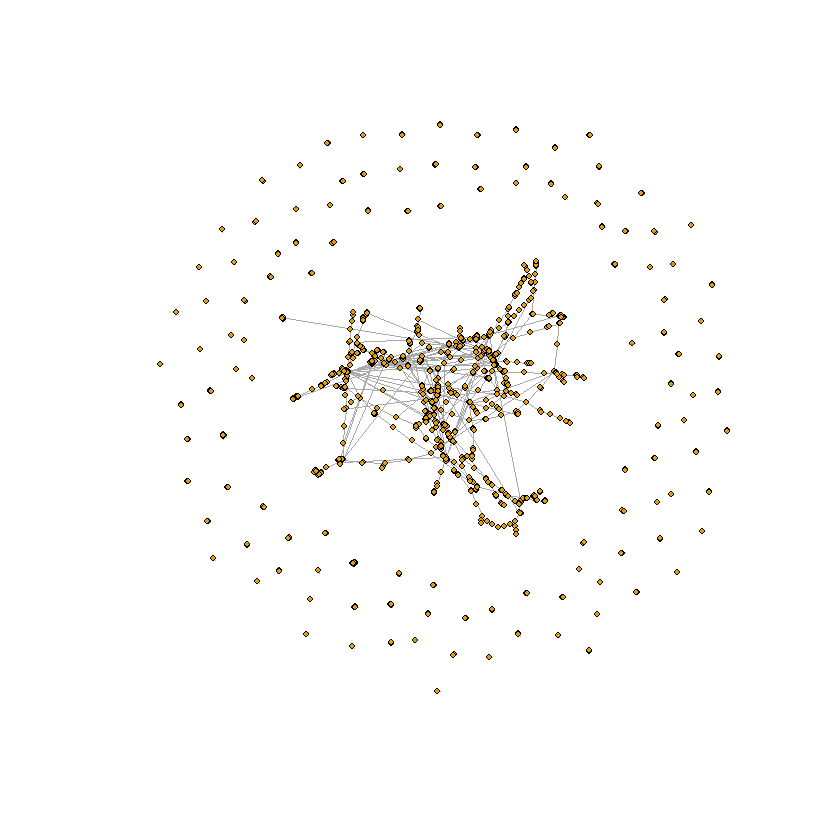

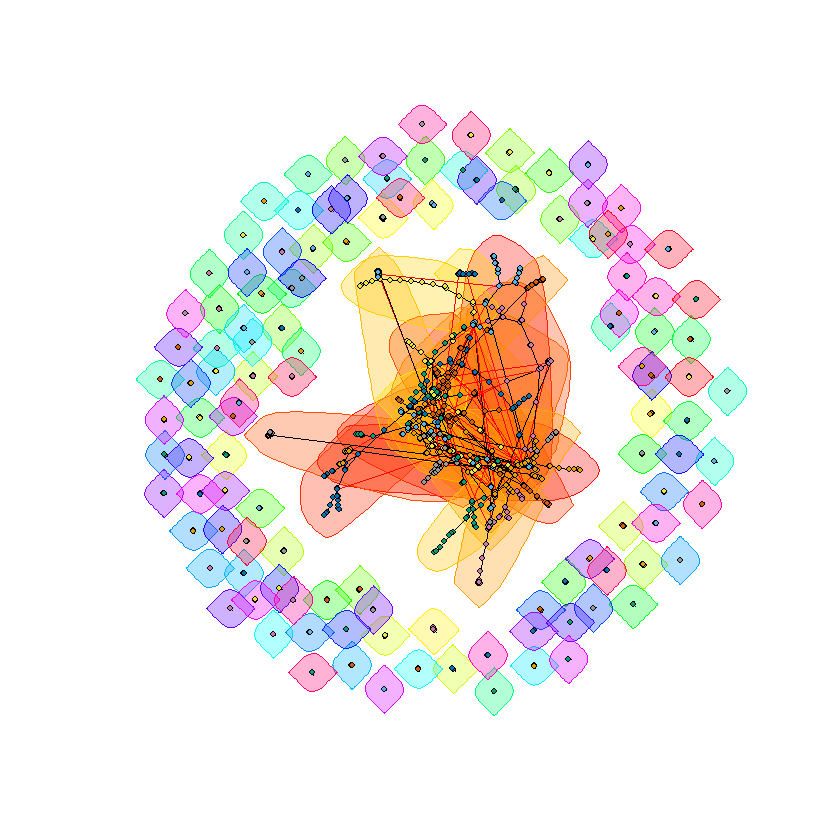

In [24]:
g2 = sample_degseq(degree_seq1, method="simple.no.multiple") 
g_community = fastgreedy.community(g2)

g_modularity = modularity(g_community)
cat("New graph: ")
plot(g2,vertex.size=2, vertex.label=NA)
cat(paste("\nModularity = ", g_modularity))
plot(g_community, g2, vertex.size=2, vertex.label=NA)